In [1]:
import pandas as pd

AAPL = '/kaggle/input/apple-stock-data-updated-till-22jun2021/AAPL.csv'
df = pd.read_csv(filepath_or_buffer=AAPL, parse_dates=['Date']).drop(columns=['Open', 'High', 'Low', 'Close'])
df['dollars'] = df['Adj Close'] * df['Volume']
df['year'] = df['Date'].dt.year
df.head()

,Date,Adj Close,Volume,dollars,year
0,1980-12-12,0.100323,469033600,4.705486e+07,1980
1,1980-12-15,0.095089,175884800,1.672471e+07,1980
2,1980-12-16,0.088110,105728000,9.315694e+06,1980
3,1980-12-17,0.090291,86441600,7.804899e+06,1980
4,1980-12-18,0.092908,73449600,6.824055e+06,1980


Let's start by just plotting the price change over time.

<Axes: xlabel='Date', ylabel='Adj Close'>

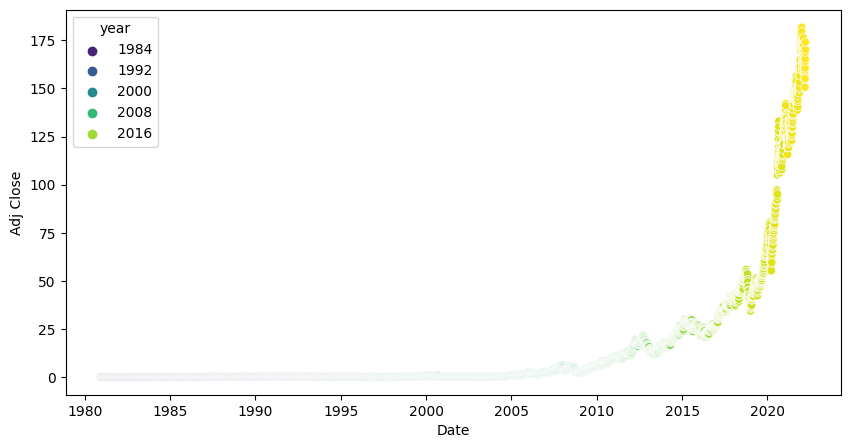

In [2]:
import matplotlib.pyplot as plt
from seaborn import scatterplot

plt.figure(figsize=(10, 5))
scatterplot(data=df, x='Date', y='Adj Close', hue='year', palette='viridis', )

We have a lot of data over many years, and the price rose a lot over the last five years in the series, so we should probably look at the log of the price.

<Axes: xlabel='Date', ylabel='Adj Close'>

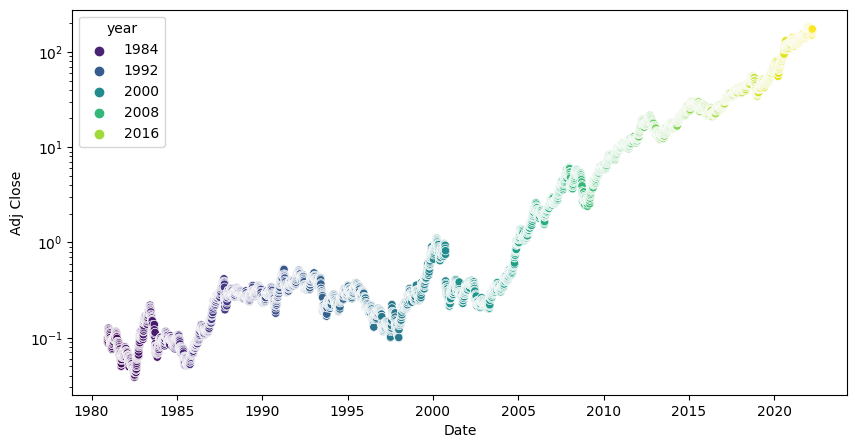

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.yscale(value='log')
scatterplot(data=df, x='Date', y='Adj Close', hue='year', palette='viridis', )

This lets us see more of the variability from the early years.

Let's also take a look at the volume over time. Because we have some very large outliers we need to use a log scale for the volume as well.

<Axes: xlabel='Date', ylabel='Volume'>

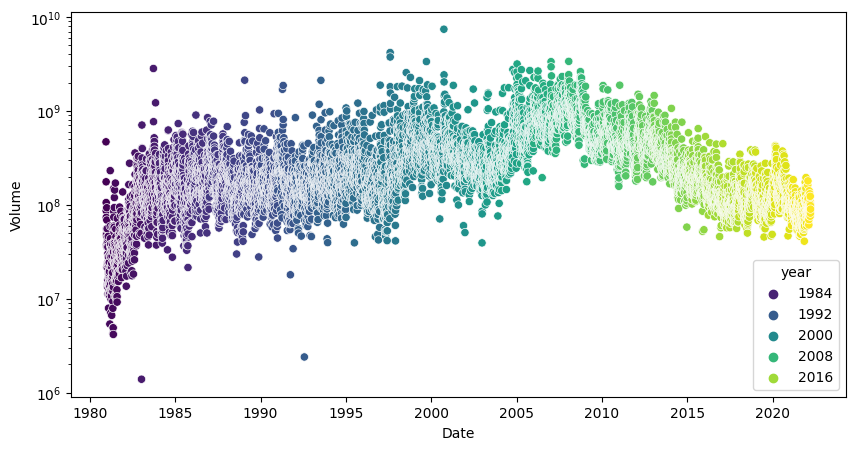

In [4]:
plt.figure(figsize=(10, 5))
plt.yscale(value='log')
scatterplot(data=df, x='Date', y='Volume', hue='year', palette='viridis', )

Above we calculated an approximation to the dollar value traded each day; what does it do over time?

<Axes: xlabel='Date', ylabel='dollars'>

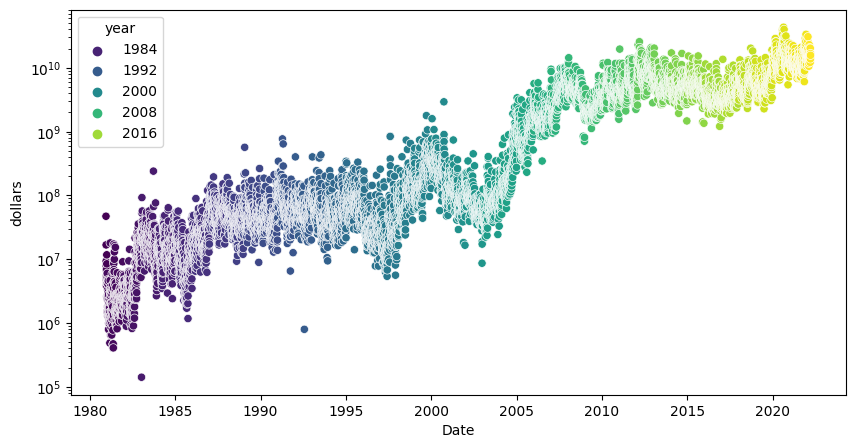

In [5]:
plt.figure(figsize=(10, 5))
plt.yscale(value='log')
scatterplot(data=df, x='Date', y='dollars', hue='year', palette='viridis', )

We see that the total dollar volume has increased steadily over time, even on a log scale.

How do price and volume relate over time? We expect the volume to decline as prices rise.

<Axes: xlabel='Adj Close', ylabel='Volume'>

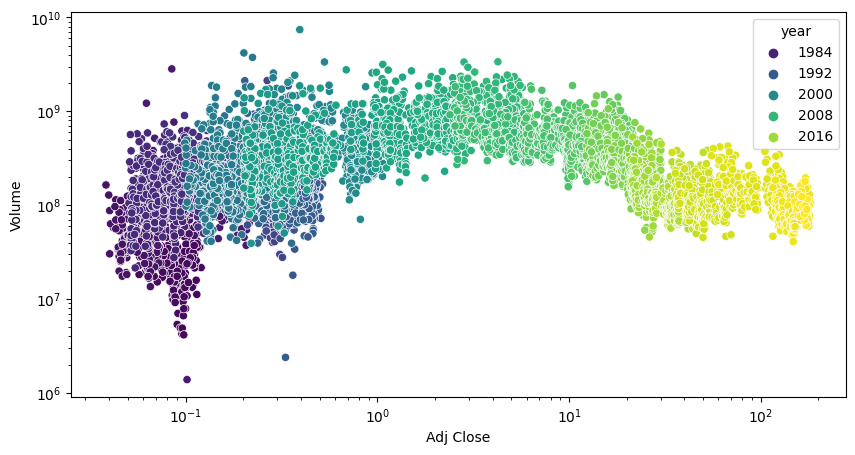

In [6]:
plt.figure(figsize=(10, 5))
plt.xscale(value='log')
plt.yscale(value='log')
scatterplot(data=df, x='Adj Close', y='Volume', hue='year', palette='viridis', )

We are using a log-log plot here, and we see that the price/volume curve has a hump in it, where volume broadly grew over time before declining.

<Axes: xlabel='Volume', ylabel='Adj Close'>

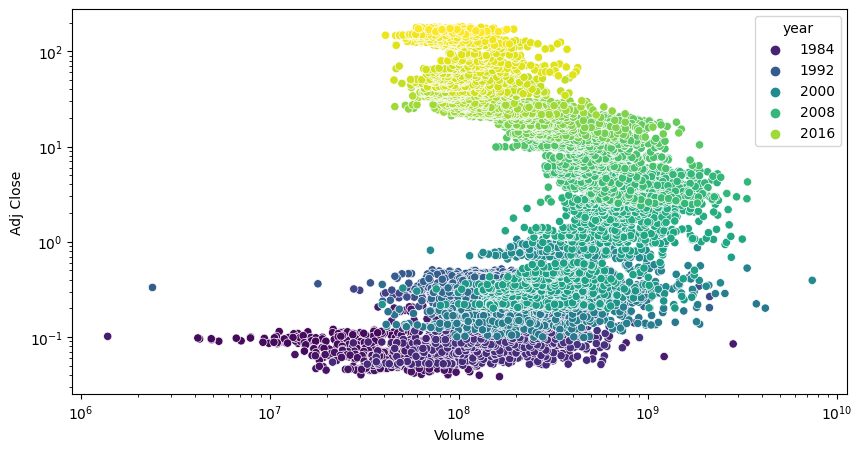

In [7]:
plt.figure(figsize=(10, 5))
plt.xscale(value='log')
plt.yscale(value='log')
scatterplot(data=df, y='Adj Close', x='Volume', hue='year', palette='viridis', )

It certainly seems like the price is a function of volume, rather than the other way around.